In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
Seasonal = train.loc[:,['Store','Date','DayOfWeek','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']]
Seasonal = Seasonal.set_index(['Date']).sort_index()
Seasonal.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1
2013-01-01,379,2,0,0,0,0,a,1
2013-01-01,378,2,0,0,0,0,a,1
2013-01-01,377,2,0,0,0,0,a,1
2013-01-01,376,2,0,0,0,0,a,1


# Understanding the data set and visualizations

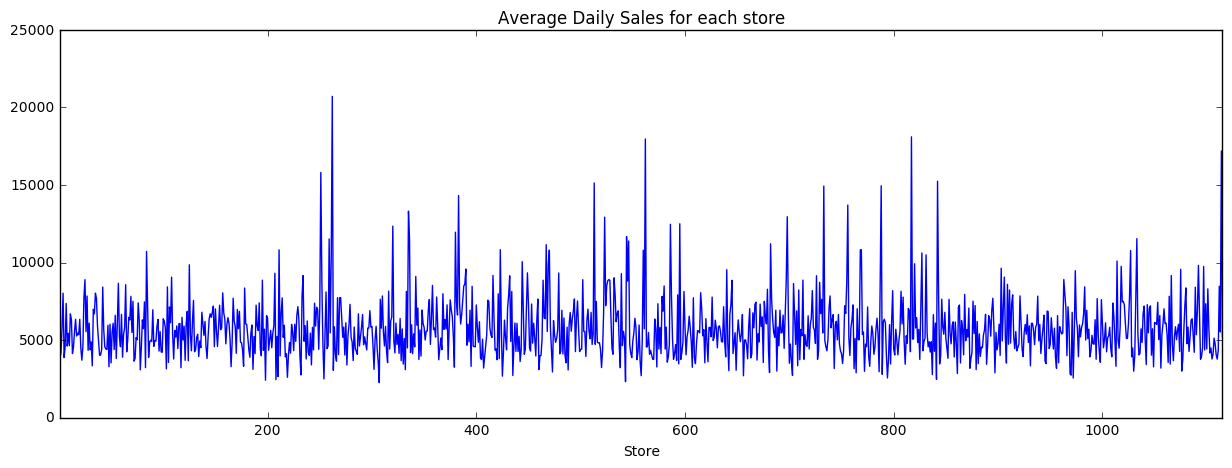

In [105]:
#Average daily sales for each store
a =Seasonal.groupby(['Store']).mean()
a.Sales.plot(kind = 'line', figsize = (15,5), title='Average Daily Sales for each store')
plt.show()

#Few stores have considerably large average daily sale

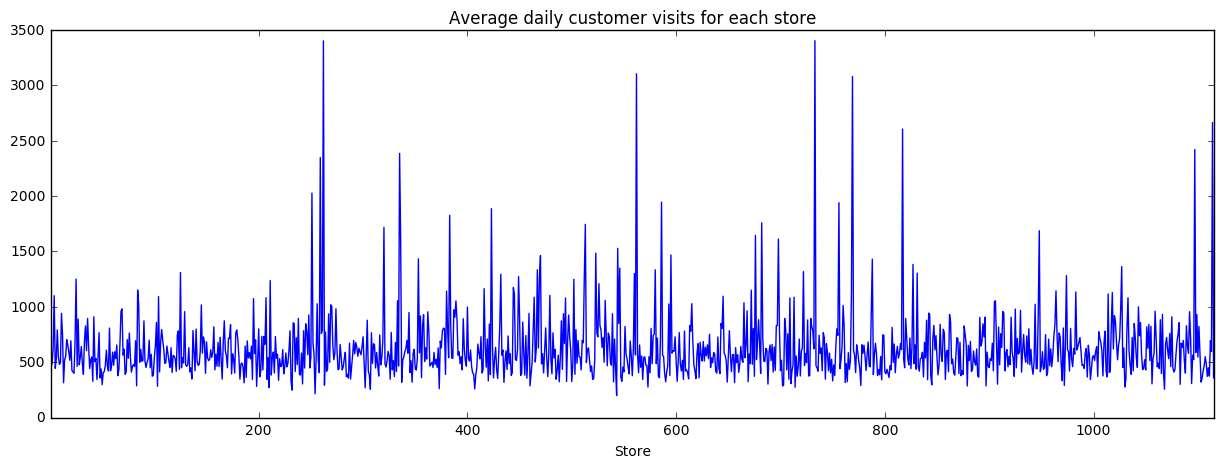

In [9]:
#Average daily customers visit for each store
a.Customers.plot(kind = 'line', figsize = (15,5), title ='Average daily customer visits for each store')
plt.show()
#Stores which have higher average daily sale have higher average daily customer visits
#Sales and customer visit have a direct relationship

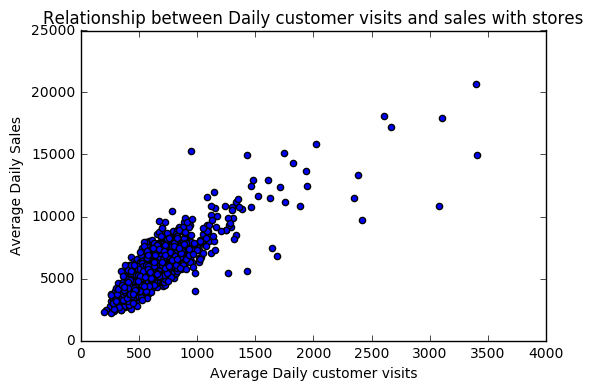

In [10]:
#Relationship between Average daily customer visits and average daily sales for each store
plt.scatter(a.Customers, a.Sales)
plt.title('Relationship between Daily customer visits and sales with stores')
plt.xlabel('Average Daily customer visits')
plt.ylabel('Average Daily Sales')
plt.show()

# Observations with time

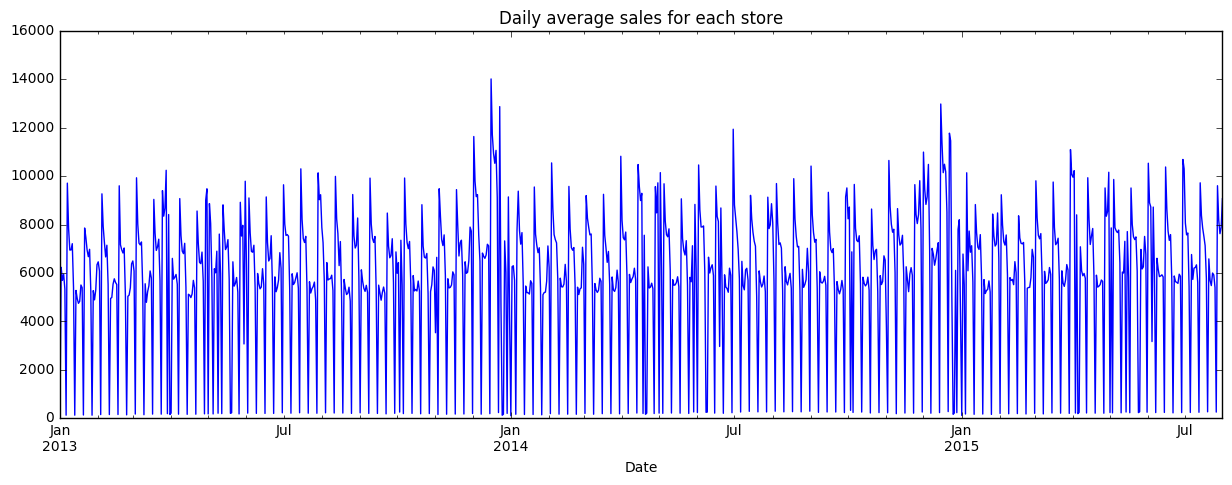

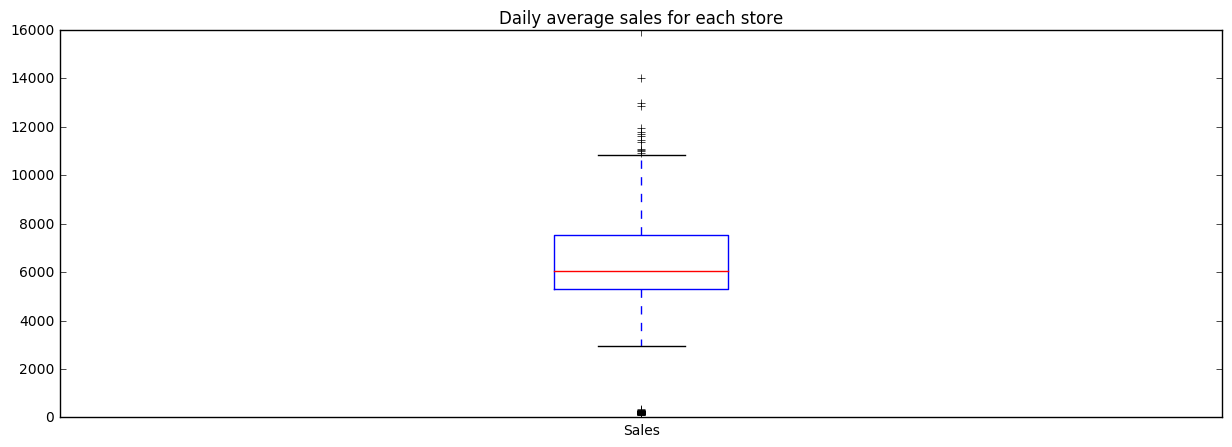

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Date,,,,,,,
2013-12-02,558.000000,1.0,11634.475336,1075.517489,1.000000,1.0,0.000000
2013-12-16,558.000000,1.0,14012.150673,1202.044843,1.000000,1.0,0.000000
2013-12-17,558.000000,2.0,11707.617040,1075.226009,1.000000,1.0,0.000000
2013-12-20,558.000000,5.0,11062.328251,1093.530942,1.000000,1.0,0.025112
2013-12-23,558.000000,1.0,12870.005381,1361.973094,1.000000,0.0,1.000000
2014-06-30,558.000000,1.0,11935.965919,1066.761435,0.997309,1.0,0.000000
2014-12-15,560.543316,1.0,12976.878075,1128.295187,1.000000,1.0,0.000000
2014-12-16,560.543316,2.0,11359.422460,1049.835294,1.000000,1.0,0.000000
2014-12-22,560.543316,1.0,11772.878075,1208.571123,1.000000,0.0,1.000000


In [111]:
#Daily average sales for each store
b = Seasonal.resample('D').mean()
b.Sales.plot(kind= 'line', figsize =(15,5), title ='Daily average sales for each store')
plt.show()
b.Sales.plot(kind= 'box', figsize =(15,5), title ='Daily average sales for each store')
plt.show()
b.loc[b.Sales>11000,:].sort_index()
#Last few days of December and first few days of July have higher sales

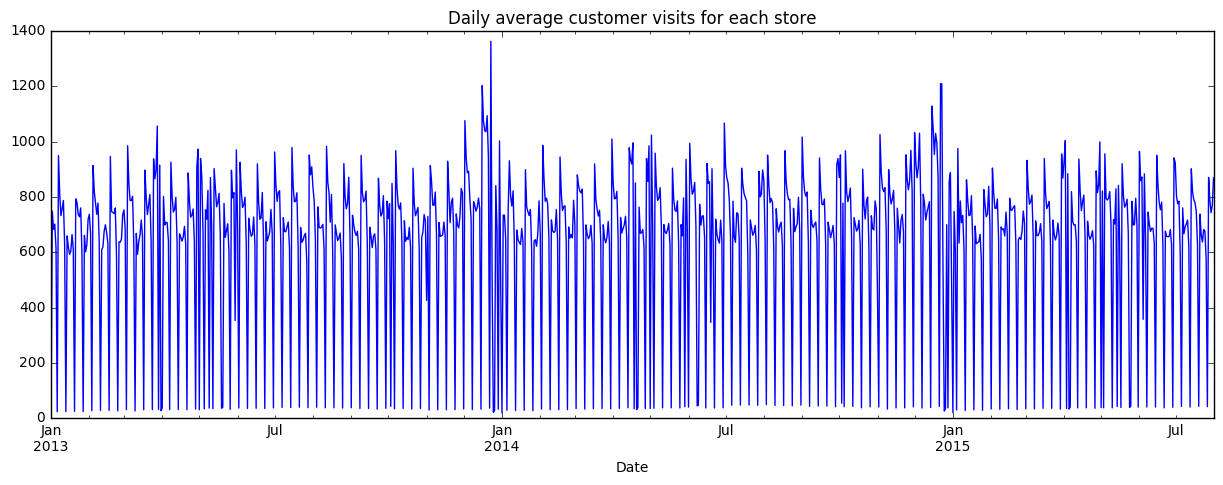

In [12]:
#Daily average customer visit for each store
b.Customers.plot(kind ='line', figsize =(15,5), title ='Daily average customer visits for each store')
plt.show()
#Last few days of December have Higher customer visits

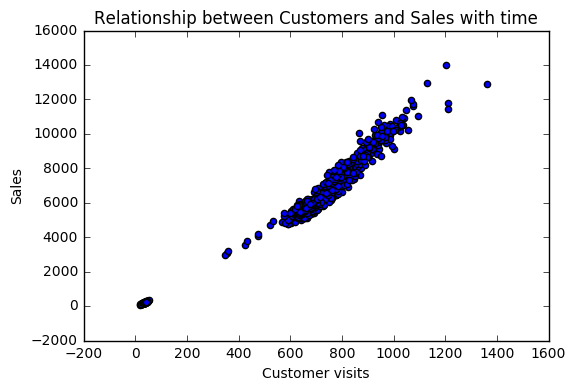

In [13]:
plt.scatter(b.Customers, b.Sales)
plt.title('Relationship between Customers and Sales with time')
plt.xlabel('Customer visits')
plt.ylabel('Sales')
plt.show()
#There's a clear linear relationship

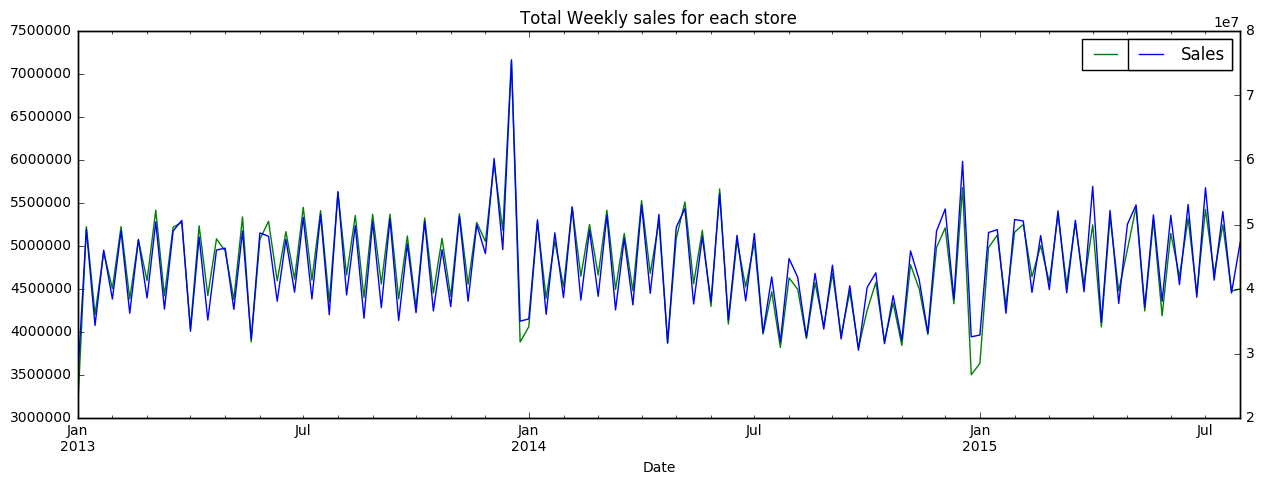

In [14]:
#Total Weekly sales for each store
c = Seasonal.resample('W').sum()
fig, ax1= plt.subplots()
ax2 = ax1.twinx()
c.Customers.plot(kind = 'line', legend = True, style = 'g-', ax = ax1, figsize = (15,5))
c.Sales.plot(kind = 'line', legend = True, style = 'b-', ax = ax2, figsize = (15,5))
plt.title('Total Weekly sales for each store')
plt.show()
#Last few weeks of December total sales increases
#Although total sales in Jan 2015 is less than total sales in Jan 2014 i.e some stores have less total sales

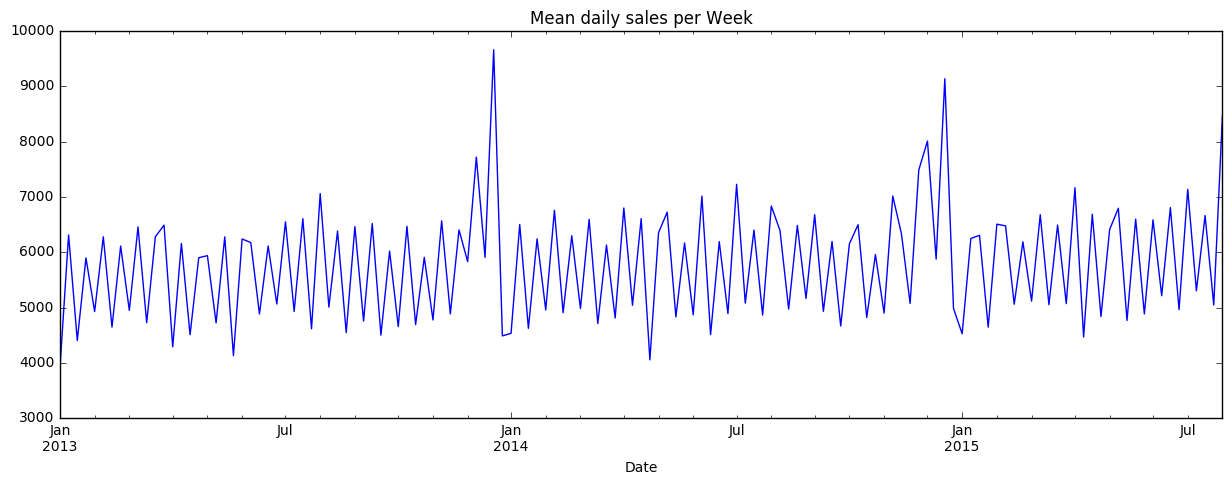

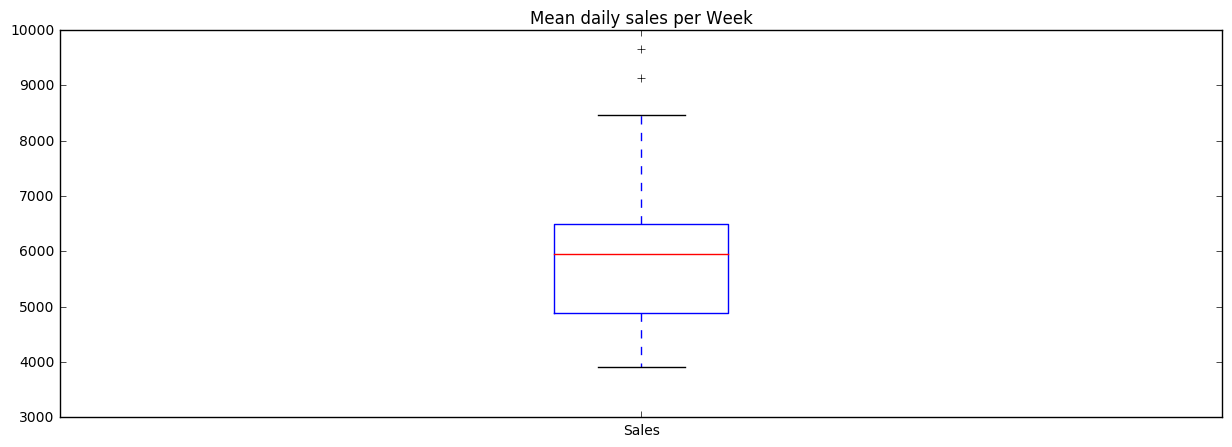

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Date,,,,,,,
2013-12-22,558.000000,4.0,9656.800641,918.132864,0.860730,0.714286,0.007175
2014-12-21,560.543316,4.0,9133.718411,867.673186,0.861268,0.714286,0.000000


In [113]:
#Average daily sales per week for all the stores 
#Average day sale in last few weeks of december and first few weeks of July is more 
d = Seasonal.resample('W').mean()
d.Sales.plot(kind = 'line', figsize = (15,5), title ='Mean daily sales per Week')
plt.show()
d.Sales.plot(kind = 'box', figsize = (15,5), title ='Mean daily sales per Week')
plt.show()
d.loc[d.Sales>8500]
#Although total sales for Jan 2015 were less mean daily sales per week is almost equal in the last week of December

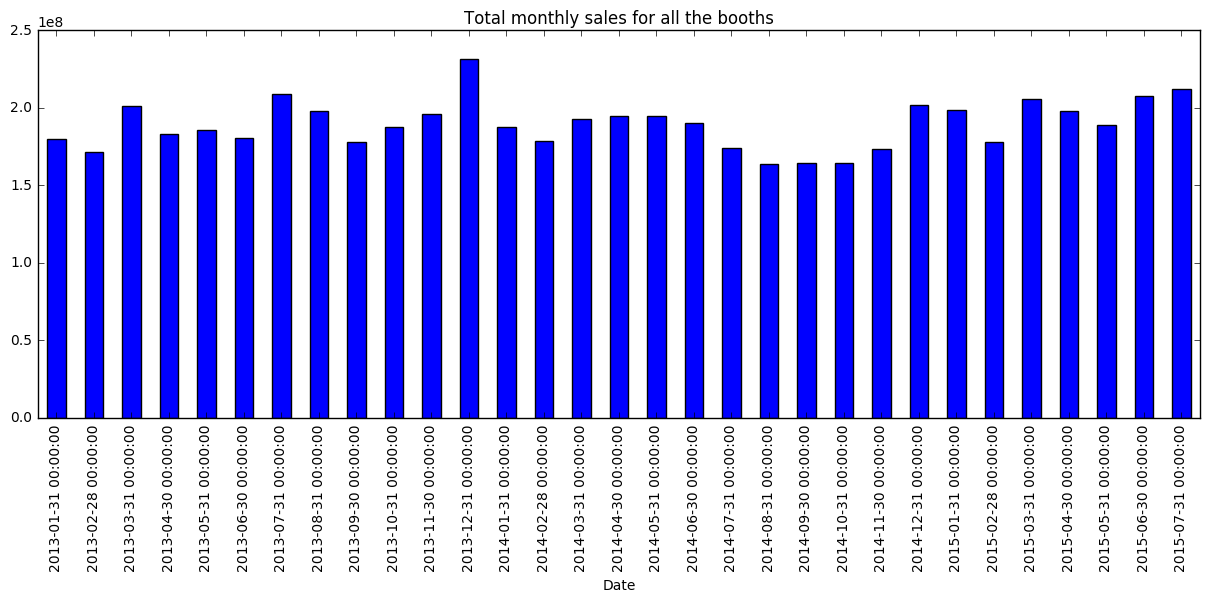

In [16]:
#Total monthly sales for all the booths
e = Seasonal.resample('M').sum()
e.Sales.plot(kind = 'bar', figsize = (15,5), title ='Total monthly sales for all the booths')
plt.show()
# Nothing can be clearly concluded from total monthly sales

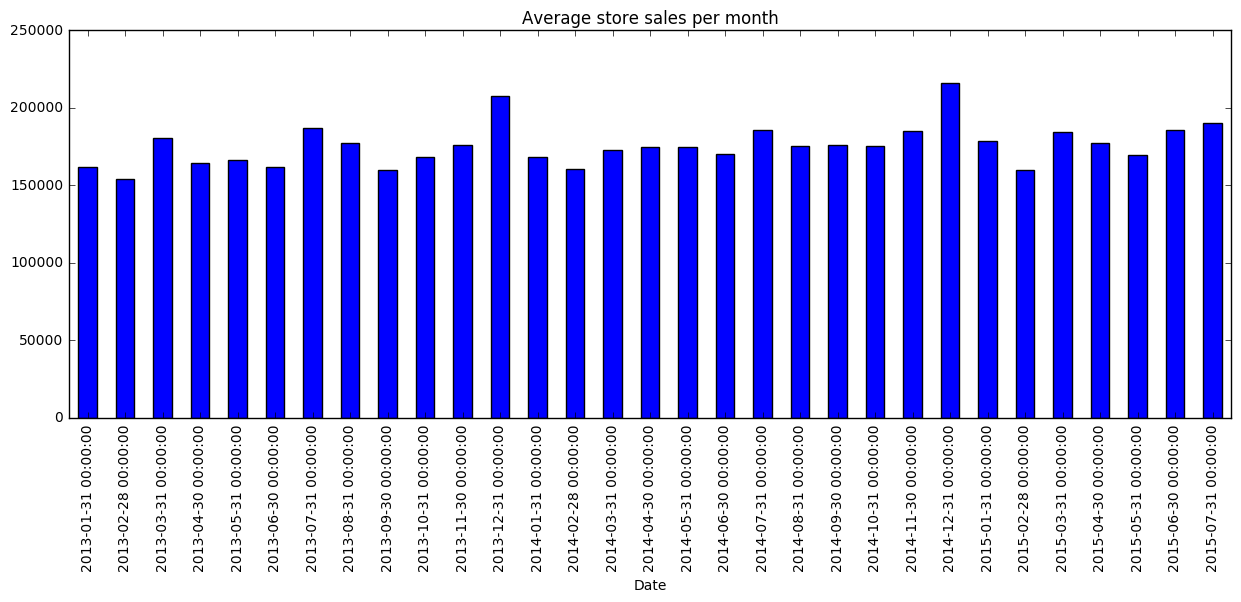

In [17]:
#Average store sale per month
def func(array):
    NewArray = array.groupby('Store').sum()
    return NewArray.Sales.mean()
f = Seasonal.resample('M').apply(func)
f.Sales.plot(kind = 'bar', figsize =(15,5), title = 'Average store sales per month')
plt.show()
#Average store sales per month in December is highest in the year
#Average store sales per month in July is also comparatively large although less than December
#Average store sales per month in February is least in the whole year

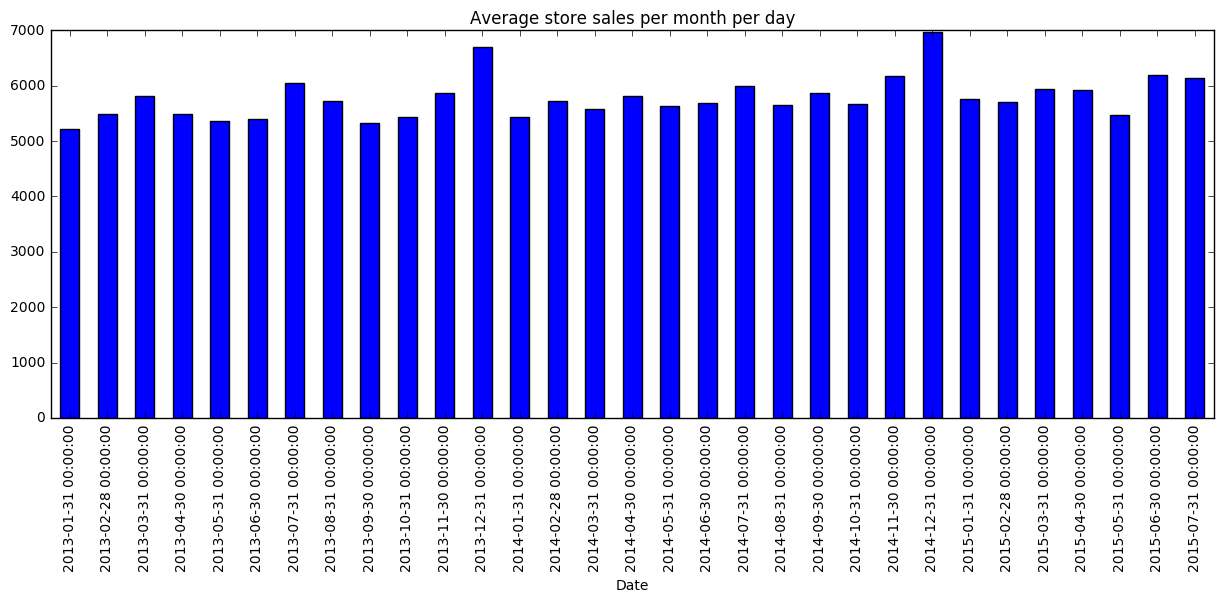

In [18]:
#Average store sale per month per day
def func1(array):
    NewArray = array.groupby('Store').mean()
    return NewArray.Sales.mean()
g = Seasonal.resample('M').apply(func1)
g.Sales.plot(kind = 'bar', figsize =(15,5), title = 'Average store sales per month per day')
plt.show()
#Highest dec average store sale per month per day

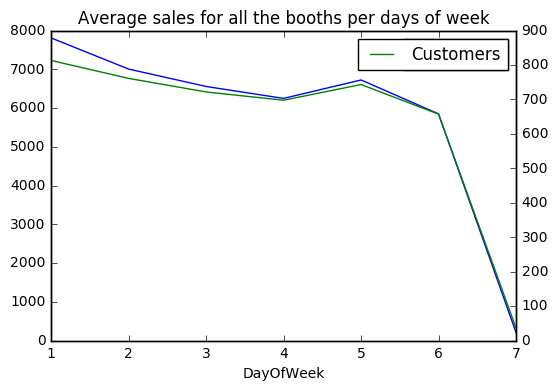

In [19]:
#Sales dependence on week days
h = Seasonal.groupby('DayOfWeek').mean()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
h.Sales.plot(ax = ax1, style = 'b-', legend=True)
h.Customers.plot(ax = ax2, style = 'g-', legend =True)
plt.title('Average sales for all the booths per days of week')
plt.show()
#Mondays have clearly highest number of sales
#Sundays are closed
#During the weekdays sales and customers dip on Thursdays and again increase on Fridays

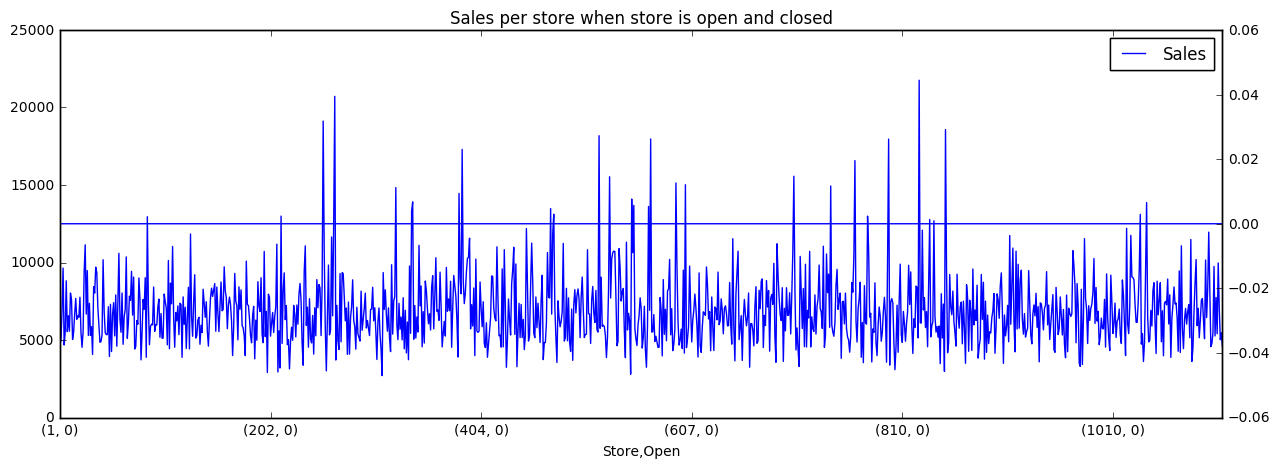

In [20]:
#Sales per store when store is opened and closed
i = Seasonal.groupby(['Store','Open']).mean()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
i.loc[pd.IndexSlice[:,1],'Sales'].plot(kind='line',figsize=(15,5), ax =ax1, legend ='True', title = 'Sales per store when store is open and closed')
i.loc[pd.IndexSlice[:,0],'Sales'].plot(kind='line',figsize=(15,5),ax = ax2, legend ='True')
plt.show()
#As expected sales per store when store is closed is zero for all the stores

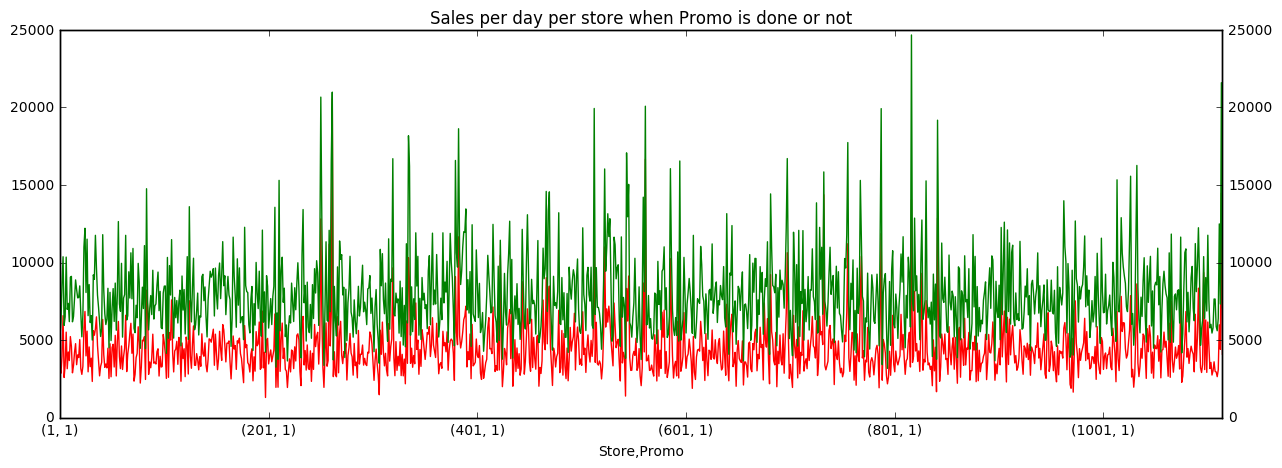

In [21]:
#Sales per day per store when Promo is done or not
j = Seasonal.groupby(['Store','Promo']).mean()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
j.loc[pd.IndexSlice[:,0],'Sales'].plot(kind='line',figsize=(15,5),style = 'r-',ax = ax1, title='Sales per day per store when Promo is done or not')
j.loc[pd.IndexSlice[:,1],'Sales'].plot(kind='line', figsize =(15,5),style = 'g-',ax=ax2)
plt.show()
#Few stores have more per day sale in comparison to others when promo is done

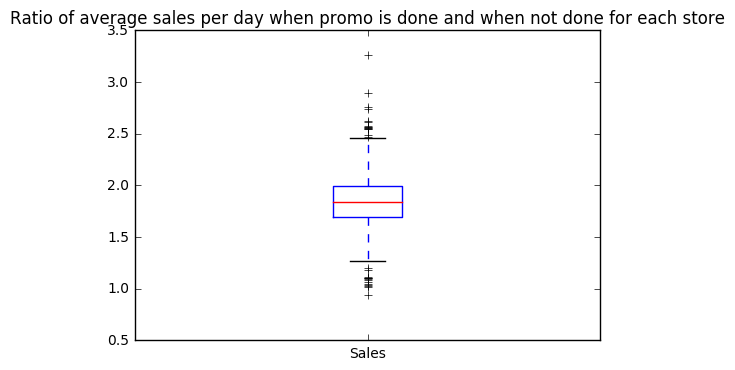

Stores with ratio greater than 2.5 are [  96  198  271  286  489  543  552  575  607  635  693  898 1108]
Stores with ratio less than 1.3 are [  85  259  262  274  299  353  423  512  530  562  676  733  769  948 1097]


In [44]:
#Ratio of average sales per day when promo is done and when not done for each store. 
k1 = Seasonal.loc[Seasonal.Promo ==1, :].groupby('Store').mean()
k2 = Seasonal.loc[Seasonal.Promo ==0, :].groupby('Store').mean()
k1.Sales.div(k2.Sales, axis = 0).plot(kind ='box', title = 'Ratio of average sales per day when promo is done and when not done for each store')
m = k1.Sales.div(k2.Sales, axis = 0)
plt.show()
print('Stores with ratio greater than 2.5 are {}'.format(np.array(m[m >=2.5].index)))
print('Stores with ratio less than 1.3 are {}'.format(np.array(m[m <=1.3].index)))
#When ratio is greater than 2.5 few stores are outliers

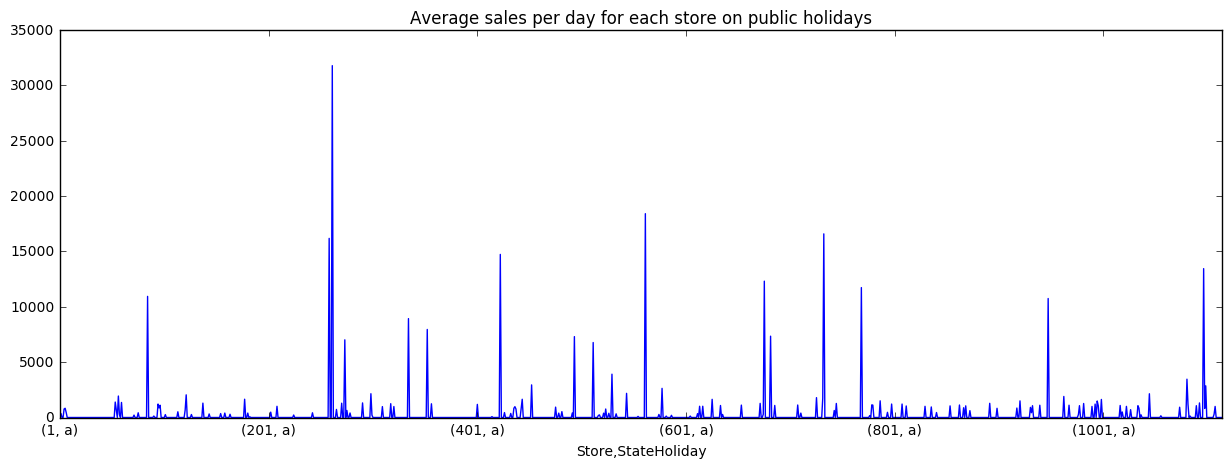

Stores which have average sales per day on public holiday less than 2500 and greater than zero [   2    5    6    7   54   55   57   58   60   72   76   91   95   96   97
  102  114  121  122  127  138  144  155  159  164  178  181  183  203  209
  225  243  266  271  276  279  291  299  300  310  318  321  357  401  415
  427  433  436  437  438  443  444  476  479  482  492  517  518  522  524
  527  534  544  555  575  582  587  605  612  614  617  626  634  636  654
  672  675  686  708  711  726  732  743  745  777  779  780  787  794  798
  808  812  830  836  841  854  863  867  869  873  892  899  918  921  931
  932  933  940  963  968  977  978  982  990  993  995  996  999 1017 1019
 1023 1027 1034 1035 1037 1045 1056 1074 1082 1084 1090 1093 1098 1107 1108]
Stores which have average sales per day on public holiday greater than 2500 [  85  259  262  274  335  353  423  453  494  512  530  562  578  676  682
  733  769  948 1081 1097 1099]


In [72]:
#Average sales per day for each store on public holidays
l = Seasonal.groupby(['Store', 'StateHoliday']).mean()
l.loc[pd.IndexSlice[:,'a'],'Sales'].plot(figsize =(15,5), title ='Average sales per day for each store on public holidays')
plt.show()
m1 = l.loc[pd.IndexSlice[:,'a'],'Sales']
print('Stores which have average sales per day on public holiday less than 2500 and greater than zero {}'.format(np.array(m1[(m1!=0)&(m1<2500)].index.get_level_values(0))))
print('Stores which have average sales per day on public holiday greater than 2500 {}'.format(np.array(m1[m1>2500].index.get_level_values(0))))
#Few stores are having average sales per day on public holiday greater than zero, while most have zero

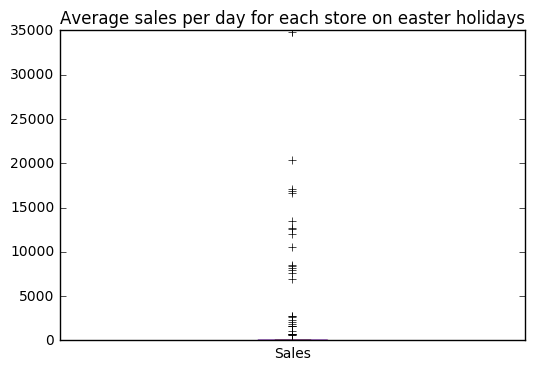

Stores which have average sales per day on easter holiday greater than zero [  85  122  209  259  262  274  299  310  335  353  423  433  453  494  512
  524  530  562  578  676  682  732  733  769  863  867  931  948 1045 1081
 1097 1099]


In [77]:
#Average sales per day for each store on easter holidays
l.loc[pd.IndexSlice[:,'b'],'Sales'].plot(kind='box', title ='Average sales per day for each store on easter holidays')
plt.show()
m2 = l.loc[pd.IndexSlice[:,'b'],'Sales']
print('Stores which have average sales per day on easter holiday greater than zero {}'.format(np.array(m2[m2!=0].index.get_level_values(0))))
#Only handful of stores have greater than zero average sales per day during easter holidays

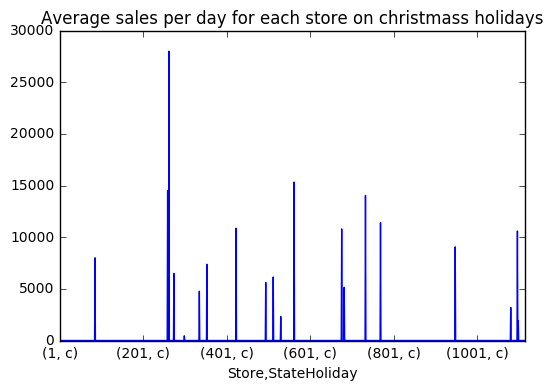

Stores which have average sales per day on christmass holiday greater than zero [  85  259  262  274  299  335  353  423  494  512  530  562  676  682  733
  769  948 1081 1097 1099]


In [79]:
#Average sales per day for each store on christmass holidays
l.loc[pd.IndexSlice[:,'c'],'Sales'].plot(title ='Average sales per day for each store on christmass holidays')
plt.show()
m3 = l.loc[pd.IndexSlice[:,'c'],'Sales']
print('Stores which have average sales per day on christmass holiday greater than zero {}'.format(np.array(m3[m3!=0].index.get_level_values(0))))
#Only handful of stores have greater than zero average sales per day during christmass holidays

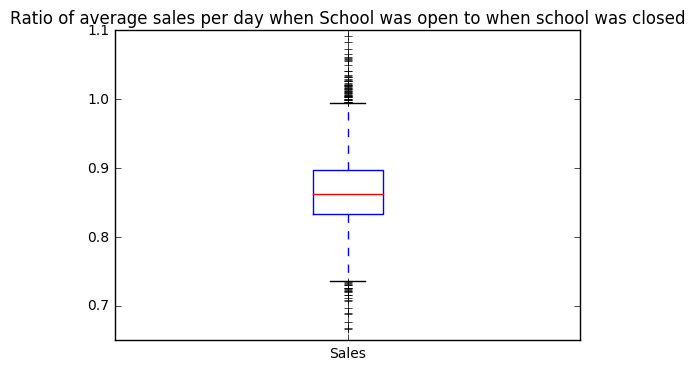

Stores where average sales per day when school was open was more than when school was closed [  10   56   77   85  107  130  182  202  226  233  245  259  262  274  285
  294  305  311  337  353  383  409  414  481  511  512  548  562  568  584
  602  659  661  662  676  708  733  744  769  773  807  818  868  937  948
  970 1020 1083 1097 1115]
Stores where ratio is less than 0.75 [   7   28   65   88  110  122  123  167  177  225  232  299  324  366  375
  396  453  454  460  462  483  489  530  559  608  635  649  688  715  732
  801  931  972 1030 1045]


In [103]:
#Ratio of average sales per day when School was open to when school was closed
n1 = Seasonal.loc[Seasonal.SchoolHoliday == 0,:].groupby('Store').mean()
n2 = Seasonal.loc[Seasonal.SchoolHoliday == 1,:].groupby('Store').mean()
n1.Sales.div(n2.Sales, axis=0).plot(kind ='box', title ='Ratio of average sales per day when School was open to when school was closed')
o = n1.Sales.div(n2.Sales, axis=0)
plt.show()
print('Stores where average sales per day when school was open was more than when school was closed {}'.format(np.array(o[o>1].index)))
print('Stores where ratio is less than 0.75 {}'.format(np.array(o[o<0.75].index)))